# 1. Basic Analysis

### Import Libraries

In [29]:
from pykrx import stock
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import pandas as pd
import plotly.express as px
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MultipleLocator

import warnings
warnings.filterwarnings('ignore')

In [9]:
today = datetime.today().strftime("%Y%m%d")
startdate = "20220101"
amorepacific = "090430"

In [10]:
### Set Dictionary (Kor -> Eng)

In [11]:
kor_to_eng = {
    "시가": "open",
    "고가": "high",
    "저가": "low",
    "종가": "close",
    "거래량": "volume",
    "등락률": "change",
    "기관합계": "institutions",
    "기타법인": "other corporates",
    "개인": "individuals",
    "외국인합계": "foreigns total",
    "전체": "total",
    "금융투자": "financial investment",
    "보험": "insurance",
    "투신": "investment trust",
    "사모": "private equity",
    "은행": "bank",
    "기타금융": "other finance",
    "연기금": "pension funds",
    "연기금 등":"pension funds and others",
    "외국인": "foreigns",
    "기타외국인": "other foreigns",
    "매도":"sell",
    "매수":"buy",
    "순매수":"net buy",
    "시가총액":"market cap",
    "거래량":"trading volume",
    "거래대금":"trading value",
    "상장주식수":"listed shares",
    "보유수량":"shares held",
    "지분율":"ownership ratio",
    "한도수량":"investment limit (shares)",
    "한도소진률":"limit usage rate"
}

In [12]:
### Custom Colour Palette

In [47]:
clr_palette = ["tomato","midnightblue","yellowgreen","lightsteelblue","dimgrey","brown", "goldenrod", "orchid", "teal", "slateblue", "darkorange", "seagreen"]

### Load Open/High/Low/Close/Volume Data

In [5]:
df_OHLCV = stock.get_market_ohlcv(startdate, today, amorepacific)
df_OHLCV.rename(columns=kor_to_eng,inplace=True)
df_OHLCV.rename_axis('date',inplace=True)
print(df_OHLCV.head())

              open    high     low   close  trading volume    change
date                                                                
2022-01-03  167500  168500  165500  168000          157696  0.598802
2022-01-04  168000  168500  165500  166500          198915 -0.892857
2022-01-05  165500  166000  160000  162000          390474 -2.702703
2022-01-06  159000  164500  158000  163500          319517  0.925926
2022-01-07  163000  164500  159000  160500          269295 -1.834862


### Print Amorepacific's Past Performance (1-year, 3-year, 5-year returns)

In [6]:
# Get the current price (most recent closing price)
current_price = df_OHLCV['close'].iloc[-1]

# Calculate 1-year return
price_1y_ago = df_OHLCV['close'].loc[df_OHLCV.index >= (df_OHLCV.index[-1] - pd.DateOffset(years=1))].iloc[0]
return_1y = ((current_price - price_1y_ago) / price_1y_ago) * 100

# Calculate 3-year return
price_3y_ago = df_OHLCV['close'].loc[df_OHLCV.index >= (df_OHLCV.index[-1] - pd.DateOffset(years=3))].iloc[0]
return_3y = ((current_price - price_3y_ago) / price_3y_ago) * 100

# Calculate 5-year return
price_5y_ago = df_OHLCV['close'].loc[df_OHLCV.index >= (df_OHLCV.index[-1] - pd.DateOffset(years=5))].iloc[0]
return_5y = ((current_price - price_5y_ago) / price_5y_ago) * 100

In [7]:
print(return_1y)
print(return_3y)
print(return_5y)

-20.70744288872513
-35.568862275449106
-35.95238095238095


### Display 50-day Simple Moving Average (SMA)

#### Apr 2022 - Apr 2023

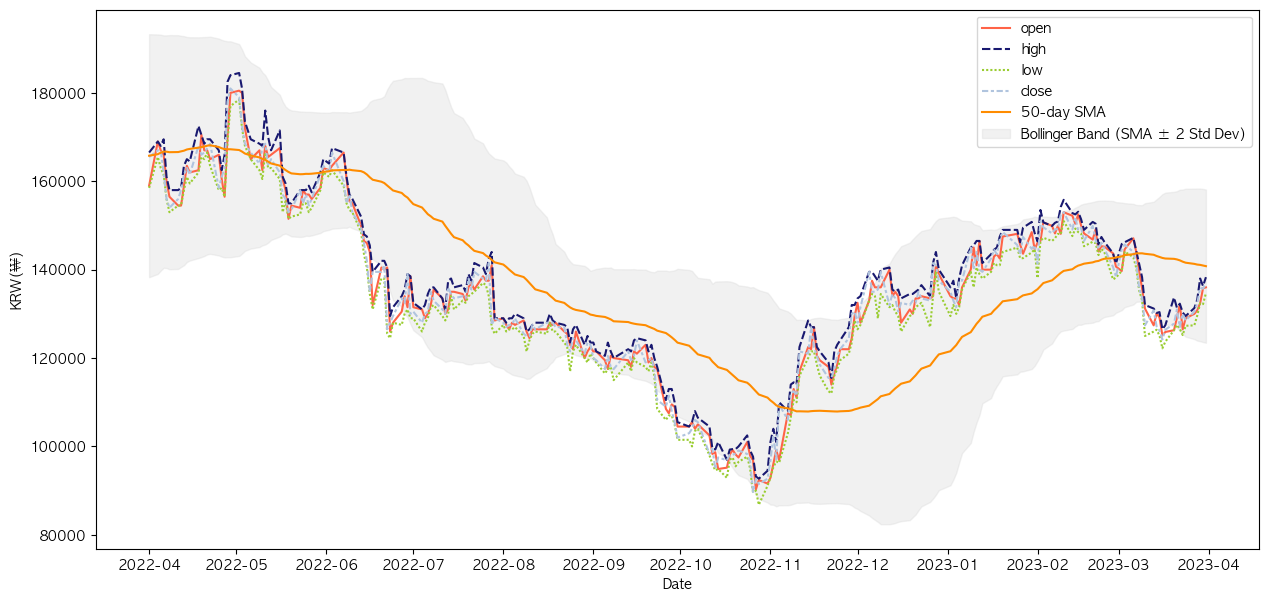

In [8]:
# Compute a 50-day Simple Moving Average (SMA)
df_OHLCV['SMA_50'] = df_OHLCV['close'].rolling(window=50).mean()

# Compute upper and lower bands for the shaded region (e.g., SMA ± 2*Standard Deviation)
df_OHLCV['std_dev'] = df_OHLCV['close'].rolling(window=50).std()
df_OHLCV['upper_band'] = df_OHLCV['SMA_50'] + 2 * df_OHLCV['std_dev']
df_OHLCV['lower_band'] = df_OHLCV['SMA_50'] - 2 * df_OHLCV['std_dev']

# Plotting the line plot
fig = plt.figure(figsize=(15, 7))
sns.lineplot(data=df_OHLCV.loc["2022-04-01":"2023-04-01"][["open", "high", "low", "close"]], palette=clr_palette)

# Plotting the moving average
'''
Purpose: The moving average is useful in identifying trends (whether the stock is in an uptrend, downtrend, or range-bound).
# When the stock price is above the moving average, it’s often interpreted as bullish (prices are trending up).
# When it’s below, it can be seen as bearish.
'''
sns.lineplot(data=df_OHLCV.loc["2022-04-01":"2023-04-01"]['SMA_50'], color='darkorange', label='50-day SMA')

# Shaded region: upper and lower bands
'''
represent the volatility or uncertainty around the average price
range of normal price fluctuations
When the stock price is near the outer bands (especially the upper band), it might indicate the stock is becoming overbought (potential for a reversal downward)
When the price is near the lower band, it may indicate the stock is oversold (potential for a reversal upward).
'''
plt.fill_between(df_OHLCV.loc["2022-04-01":"2023-04-01"].index, 
                 df_OHLCV.loc["2022-04-01":"2023-04-01"]['upper_band'], 
                 df_OHLCV.loc["2022-04-01":"2023-04-01"]['lower_band'], 
                 color='lightgray', alpha=0.3, label='Bollinger Band (SMA ± 2 Std Dev)')

# Formatting x-axis to show monthly ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Labels and title
plt.xlabel("Date")
plt.ylabel("KRW(₩)")

# Display the plot
plt.legend()
plt.show()

#### Apr 2023 - Apr 2024

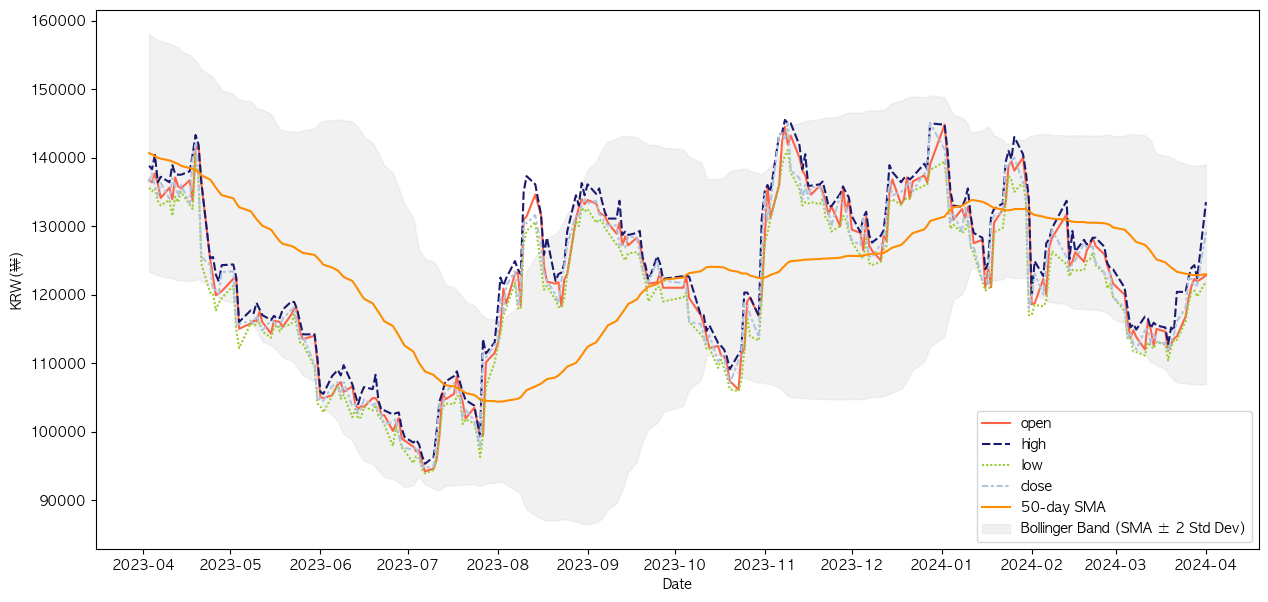

In [9]:
fig = plt.figure(figsize=(15, 7))
g = sns.lineplot(df_OHLCV.loc["2023-04-01":"2024-04-01"][["open","high","low","close"]],palette=clr_palette)

# Plotting the moving average
sns.lineplot(data=df_OHLCV.loc["2023-04-01":"2024-04-01"]['SMA_50'], color='darkorange', label='50-day SMA')

# Shaded region: upper and lower bands
plt.fill_between(df_OHLCV.loc["2023-04-01":"2024-04-01"].index, 
                 df_OHLCV.loc["2023-04-01":"2024-04-01"]['upper_band'], 
                 df_OHLCV.loc["2023-04-01":"2024-04-01"]['lower_band'], 
                 color='lightgray', alpha=0.3, label='Bollinger Band (SMA ± 2 Std Dev)')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel("Date")
plt.ylabel("KRW(₩)")
plt.legend()
plt.show()

#### Apr 2024 - Apr 2025

In [4]:
fig = plt.figure(figsize=(15, 7))
g = sns.lineplot(df_OHLCV.loc["2024-04-01":"2025-04-01"][["open","high","low","close"]],palette=clr_palette)

# Plotting the moving average
sns.lineplot(data=df_OHLCV.loc["2024-04-01":"2025-04-01"]['SMA_50'], color='darkorange', label='50-day SMA')

# Shaded region: upper and lower bands
plt.fill_between(df_OHLCV.loc["2024-04-01":"2025-04-01"].index, 
                 df_OHLCV.loc["2024-04-01":"2025-04-01"]['upper_band'], 
                 df_OHLCV.loc["2024-04-01":"2025-04-01"]['lower_band'], 
                 color='lightgray', alpha=0.3, label='Bollinger Band (SMA ± 2 Std Dev)')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel("Date")
plt.ylabel("KRW(₩)")
plt.legend()
plt.show()

NameError: name 'df_OHLCV' is not defined

<Figure size 1500x700 with 0 Axes>

# 2. Fundamentals
1. __BPS (Book Value Per Share)__:
the net value of a company’s assets available to common shareholders, divided by the number of outstanding shares.
$$ \text{BPS} = \frac{\text{Number of Outstanding Shares}}{\text{Total Shareholder’s Equity}}$$
High BPS = indicates that a company has a strong net asset base relative to its share price, suggesting financial stability. Investors compare the BPS to the market price to assess whether the stock is overvalued or undervalued.

2. __PER (Price-to-Earnings Ratio)__:
compares a company's current share price to its earnings per share (EPS).
$$\text{PER}=\frac{\text{EPS}}{\text{Market Price Per Share}}$$
how much investors are willing to pay for each unit of earnings. <br>High PER = suggests that investors expect higher future growth and are willing to pay a premium for the stock, while a low PER could indicate that the stock is undervalued or that the company is experiencing difficulties.

3. __PBR (Price-to-Book Ratio)__:
the ratio of a company's current share price to its book value per share.
$$\text{PBR}= \frac{\text{BPS}}{\text{Market Price Per Share}}$$
A PBR of less than 1 = suggests that the market values the company below its book value, which could indicate undervaluation. Conversely, a high PBR could suggest overvaluation or that the company is expected to generate high future returns.


4. __EPS (Earnings Per Share)__:
measures a company’s profitability on a per-share basis.
$$\text{EPS}=\frac{\text{Number of Outstanding Shares}}{\text{Net Income}}$$
EPS reflects the company's ability to generate profit for shareholders.<br> Higher EPS indicates greater profitability, which could lead to higher dividends and potentially a higher stock price.

5. __DIV (Dividend)__:
refers to the total dividend payout made by a company to its shareholders, usually expressed per share or as a percentage of earnings.
<br>A consistent or growing dividend is often seen as a positive sign of a company’s financial health. It suggests that the company has sufficient cash flow to distribute to shareholders.

6. __DPS (Dividend Per Share)__:
the amount of dividend that a company pays out for each outstanding share
$$\text{DPS}= \frac{\text{Number of Outstanding Shares}}{\text{Total Dividends Paid}}$$
DPS is an important metric for income-focused investors as it shows the return they are getting on their investment in the form of dividends.<br> A high DPS can indicate strong financial performance, while a low or decreasing DPS might suggest financial strain or a preference for reinvesting earnings into growth.

In [11]:
df_fundamental = stock.get_market_fundamental(startdate, today, amorepacific)
df_fundamental.rename_axis('date',inplace=True)
print(df_fundamental.head())

              BPS     PER   PBR  EPS   DIV  DPS
date                                           
2022-01-03  64736  328.13  2.60  512  0.48  800
2022-01-04  64736  325.20  2.57  512  0.48  800
2022-01-05  64736  316.41  2.50  512  0.49  800
2022-01-06  64736  319.34  2.53  512  0.49  800
2022-01-07  64736  313.48  2.48  512  0.50  800


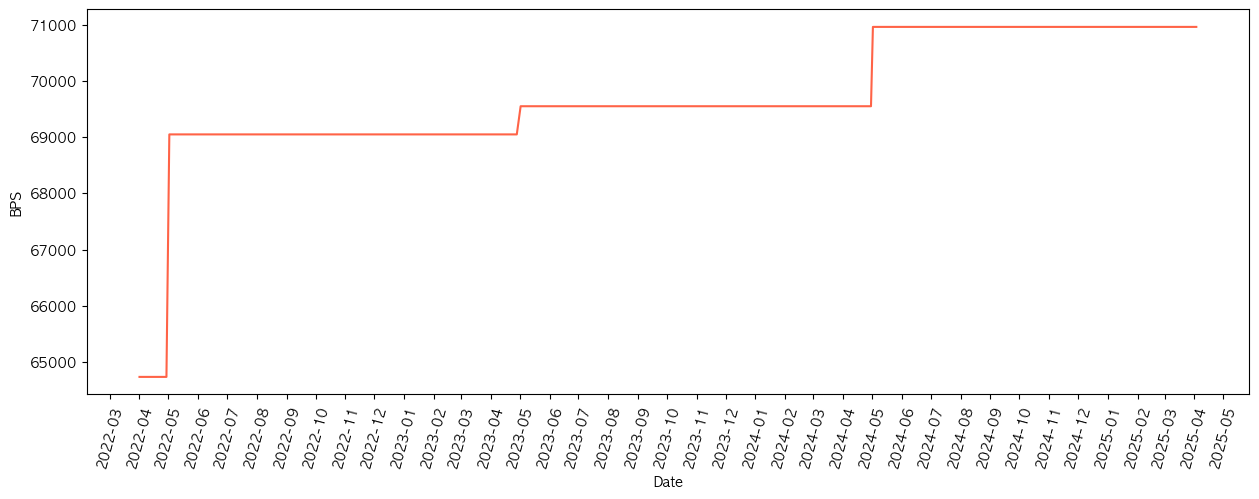

In [12]:
fig = plt.figure(figsize=(15, 5))
sns.lineplot(df_fundamental.loc["2022-04-01":]["BPS"], color="tomato")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Labels and title
plt.xlabel("Date")
plt.xticks(rotation=75)
plt.show()

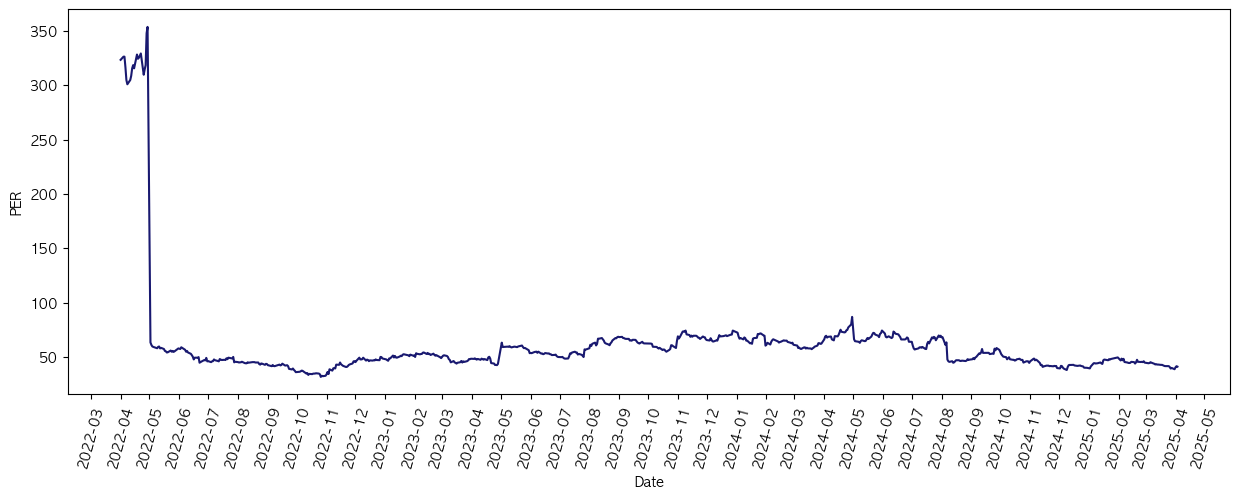

In [13]:
fig = plt.figure(figsize=(15, 5))
sns.lineplot(df_fundamental.loc["2022-04-01":]["PER"], color="midnightblue")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Labels and title
plt.xlabel("Date")
plt.xticks(rotation=75)
plt.show()

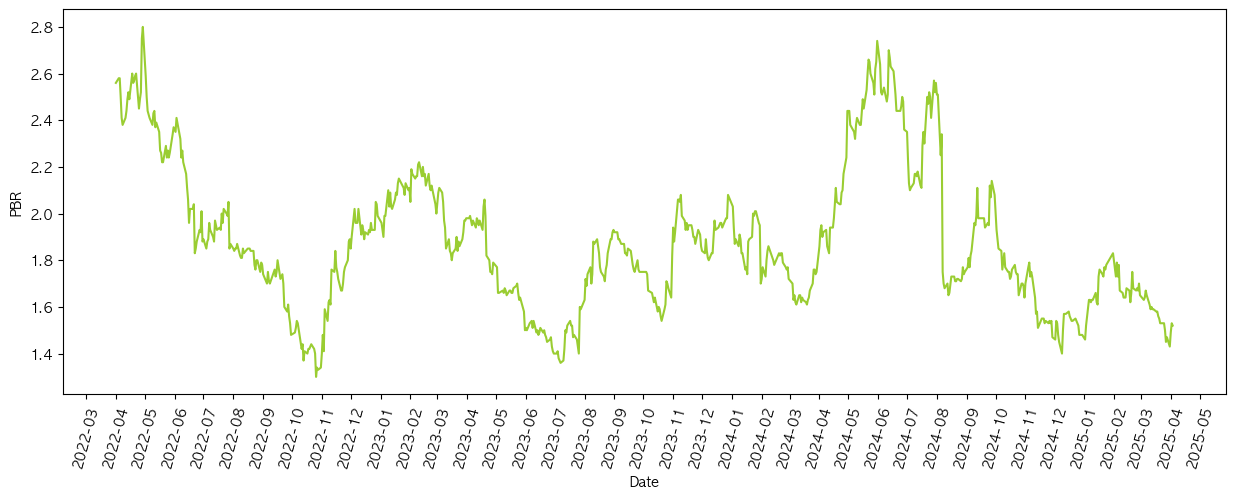

In [14]:
fig = plt.figure(figsize=(15, 5))
sns.lineplot(df_fundamental.loc["2022-04-01":]["PBR"], color="yellowgreen")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Labels and title
plt.xlabel("Date")
plt.xticks(rotation=75)
plt.show()

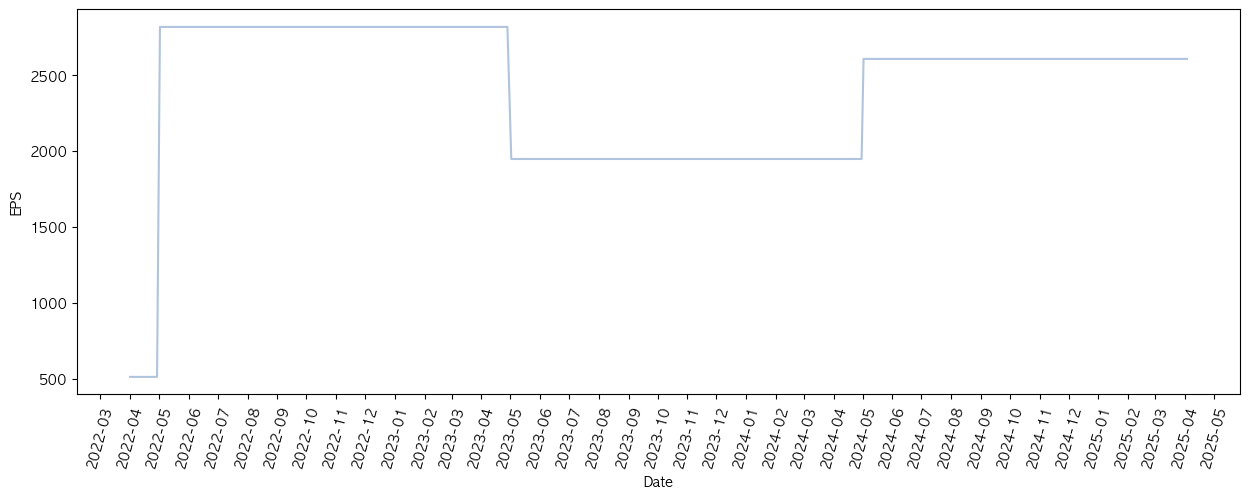

In [15]:
fig = plt.figure(figsize=(15, 5))
sns.lineplot(df_fundamental.loc["2022-04-01":]["EPS"], color="lightsteelblue")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Labels and title
plt.xlabel("Date")
plt.xticks(rotation=75)
plt.show()

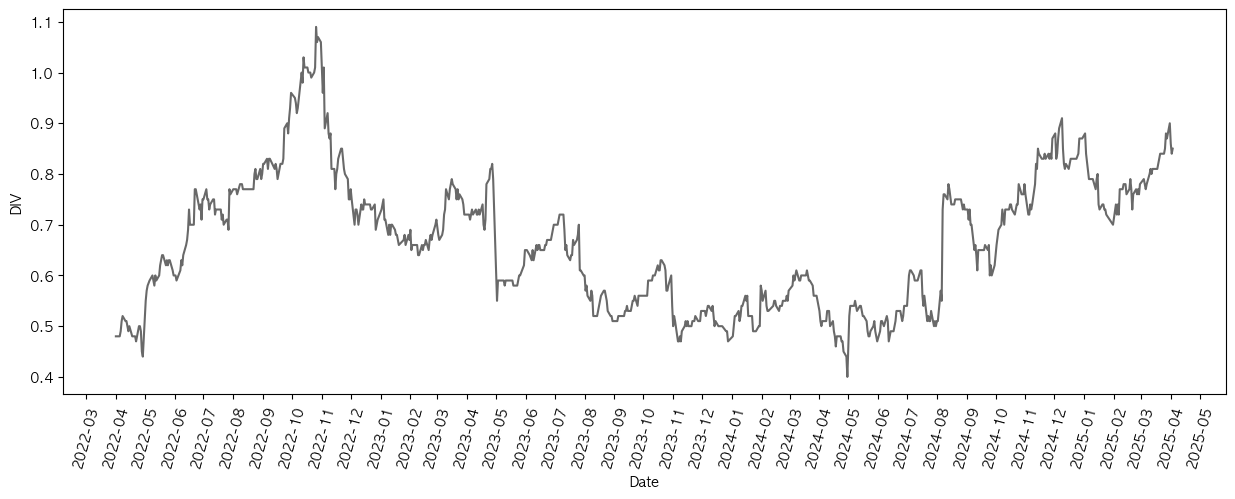

In [16]:
fig = plt.figure(figsize=(15, 5))
sns.lineplot(df_fundamental.loc["2022-04-01":]["DIV"], color="dimgrey")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Labels and title
plt.xlabel("Date")
plt.xticks(rotation=75)
plt.show()

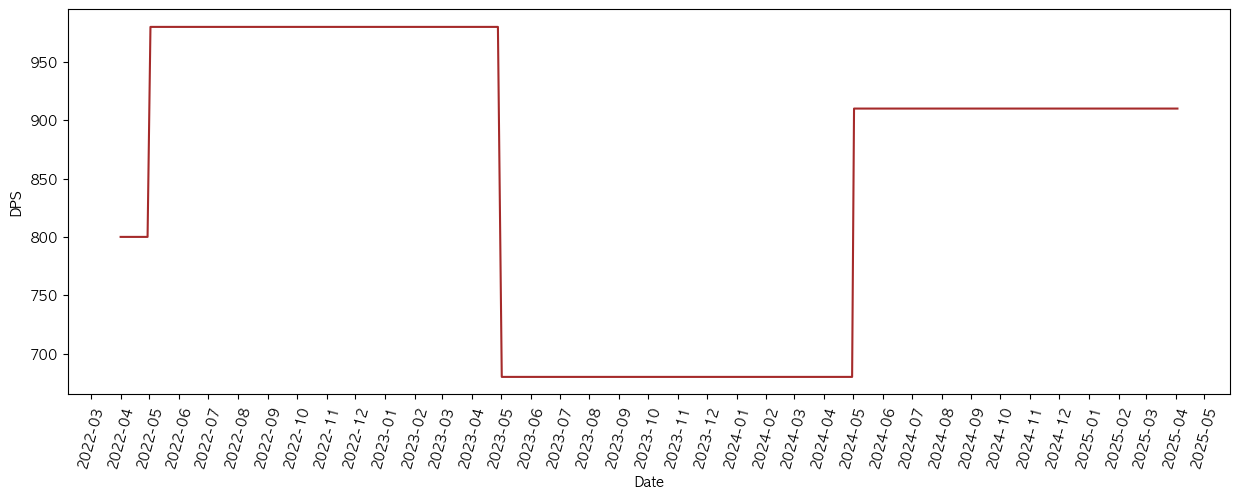

In [17]:
fig = plt.figure(figsize=(15, 5))
sns.lineplot(df_fundamental.loc["2022-04-01":]["DPS"], color="brown")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Labels and title
plt.xlabel("Date")
plt.xticks(rotation=75)
plt.show()

---

# 3. Market Trading Value

In [14]:
df_TVal = stock.get_market_trading_value_by_date(startdate, today, amorepacific,detail=True)
df_TVal.rename(columns=kor_to_eng,inplace=True)
df_TVal.rename_axis('date',inplace=True)
print(df_TVal.head())

            financial investment   insurance  investment trust  \
date                                                             
2022-01-03           -1520232000  -176205500         -58267000   
2022-01-04           -7171325000   -63641500        -664262500   
2022-01-05           -8021125500  -646195500       -1607641500   
2022-01-06           -4040609500 -1112853000         229624000   
2022-01-07           -2887247000  -321147500         127532000   

            private equity      bank  other finance  pension funds  \
date                                                                 
2022-01-03        27114000 -19420000              0    -1017120000   
2022-01-04     -1894169500 -12294000      -15276500    -1979371500   
2022-01-05       -15124500    324000        1931500     -595865000   
2022-01-06      -476601500    950000      -55127000    -1669626500   
2022-01-07       325372000         0              0     2990508500   

            other corporates  individuals     

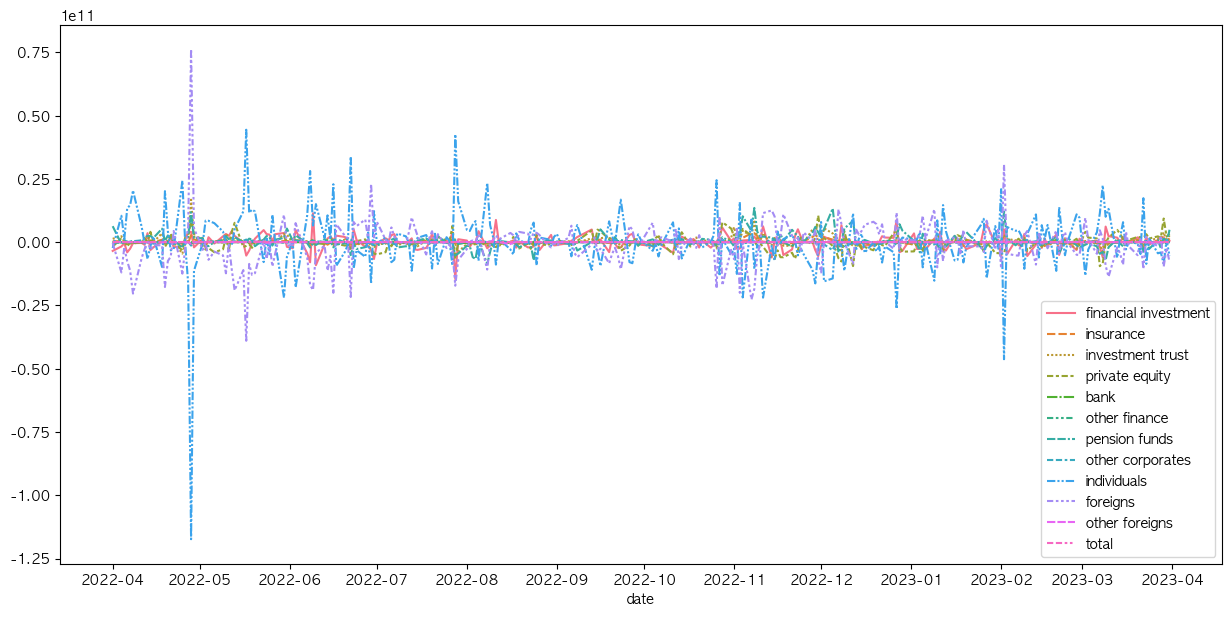

In [24]:
fig = plt.figure(figsize=(15, 7))
g = sns.lineplot(df_TVal.loc["2022-04-01":"2023-04-01"])
# Formatting x-axis to show monthly ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.show()

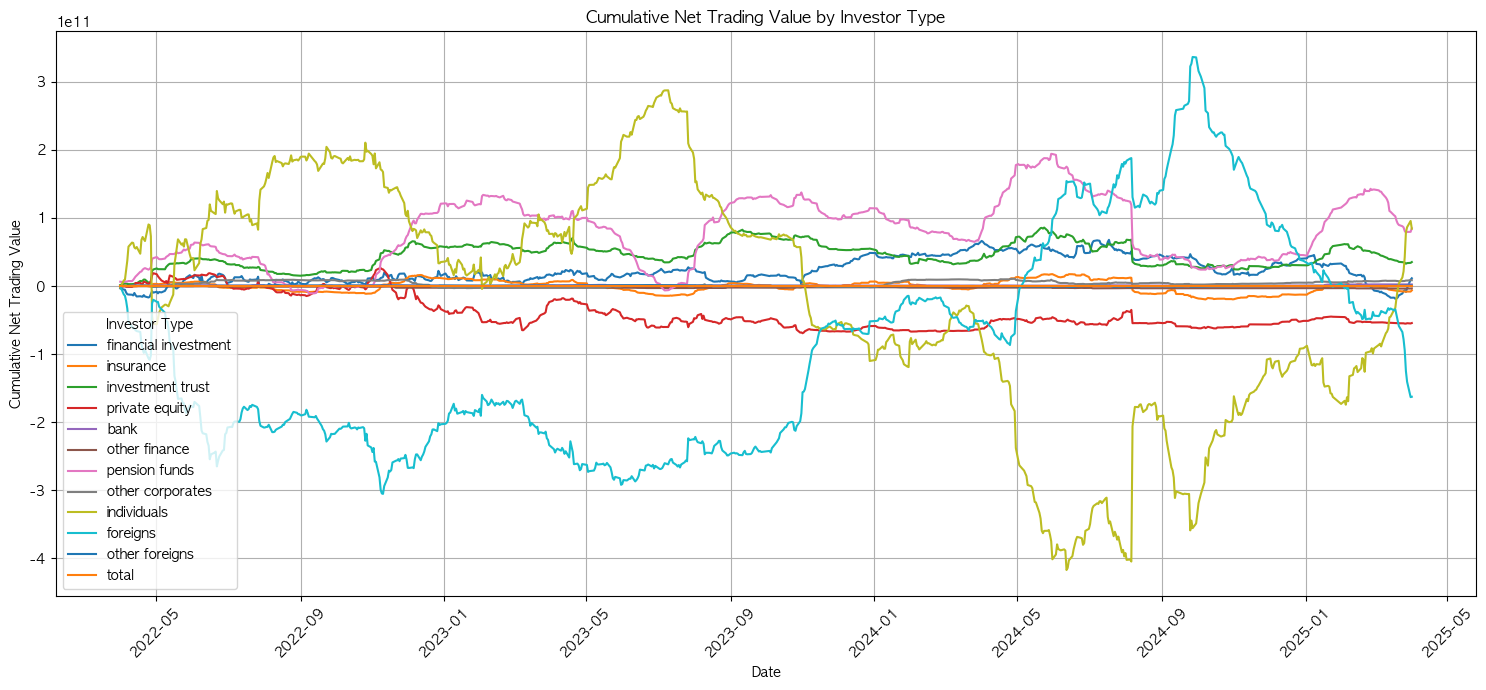

In [40]:
# Compute cumulative sum
df_cum = df_TVal.loc["2022-04-01":"2025-04-01"].cumsum()

# Plot cumulative net trading value
plt.figure(figsize=(15, 7))
for investor in df_cum.columns:
    plt.plot(df_cum.index, df_cum[investor], label=investor)

# Formatting
plt.title("Cumulative Net Trading Value by Investor Type")
plt.xlabel("Date")
plt.ylabel("Cumulative Net Trading Value")
plt.xticks(rotation=45)
plt.legend(title="Investor Type")
plt.grid(True)
plt.tight_layout()
plt.show()

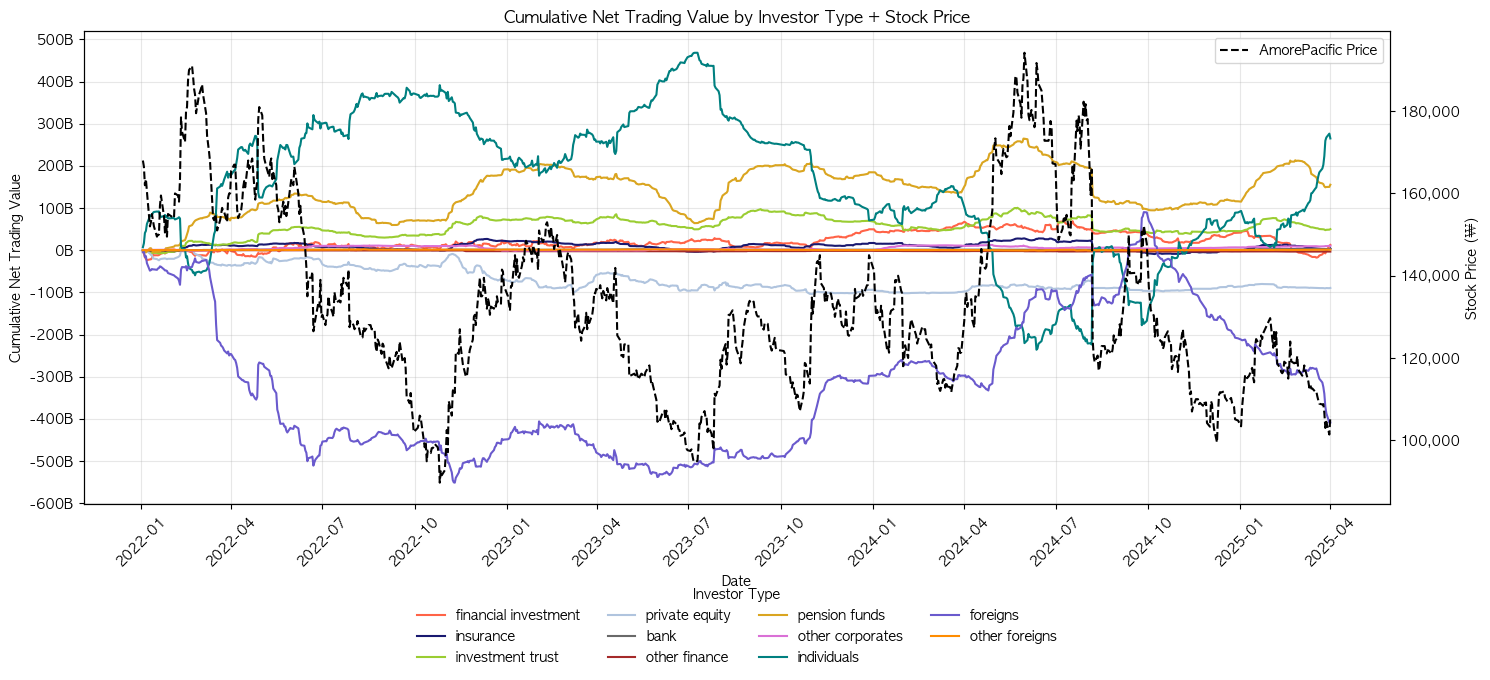

In [48]:
# Compute cumulative net trading value (drop 'total')
df_cum = df_TVal.drop(columns='total', errors='ignore').loc["2022-01-01":"2025-04-01"].cumsum()

# Retrieve AmorePacific price data
amore_price = stock.get_market_ohlcv_by_date("2022-01-01", "2025-04-01", amorepacific)
price_series = amore_price['종가']  # Adjust to match your column name if different
price_series.index.name = 'date'
price_series = price_series.loc[df_cum.index.min():df_cum.index.max()]

# Plot
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot cumulative net trading value
# for i, investor in df_cum.columns:
for i, investor in enumerate(df_cum.columns):
    color = clr_palette[i % len(clr_palette)]  # Reuse colors if fewer than investors
    ax1.plot(df_cum.index, df_cum[investor], label=investor, color=color)
    # ax1.plot(df_cum.index, df_cum[investor], label=investor)

# Format left y-axis: readable format like 1B
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*1e-9:.0f}B'))
ax1.yaxis.set_major_locator(MultipleLocator(10e10))

# Format x-axis: quarterly ticks
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Labels and grid
ax1.set_xlabel("Date")
ax1.set_ylabel("Cumulative Net Trading Value")
ax1.set_title("Cumulative Net Trading Value by Investor Type + Stock Price")
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)
ax1.legend(
    title="Investor Type",
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),  # Centered below the plot
    ncol=4,  # Number of columns in the legend (adjust as needed)
    frameon=False
)

# Plot AmorePacific price on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(price_series.index, price_series.values, color='black', linestyle='--', label="AmorePacific Price")
ax2.set_ylabel("Stock Price (₩)")
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Format with commas
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

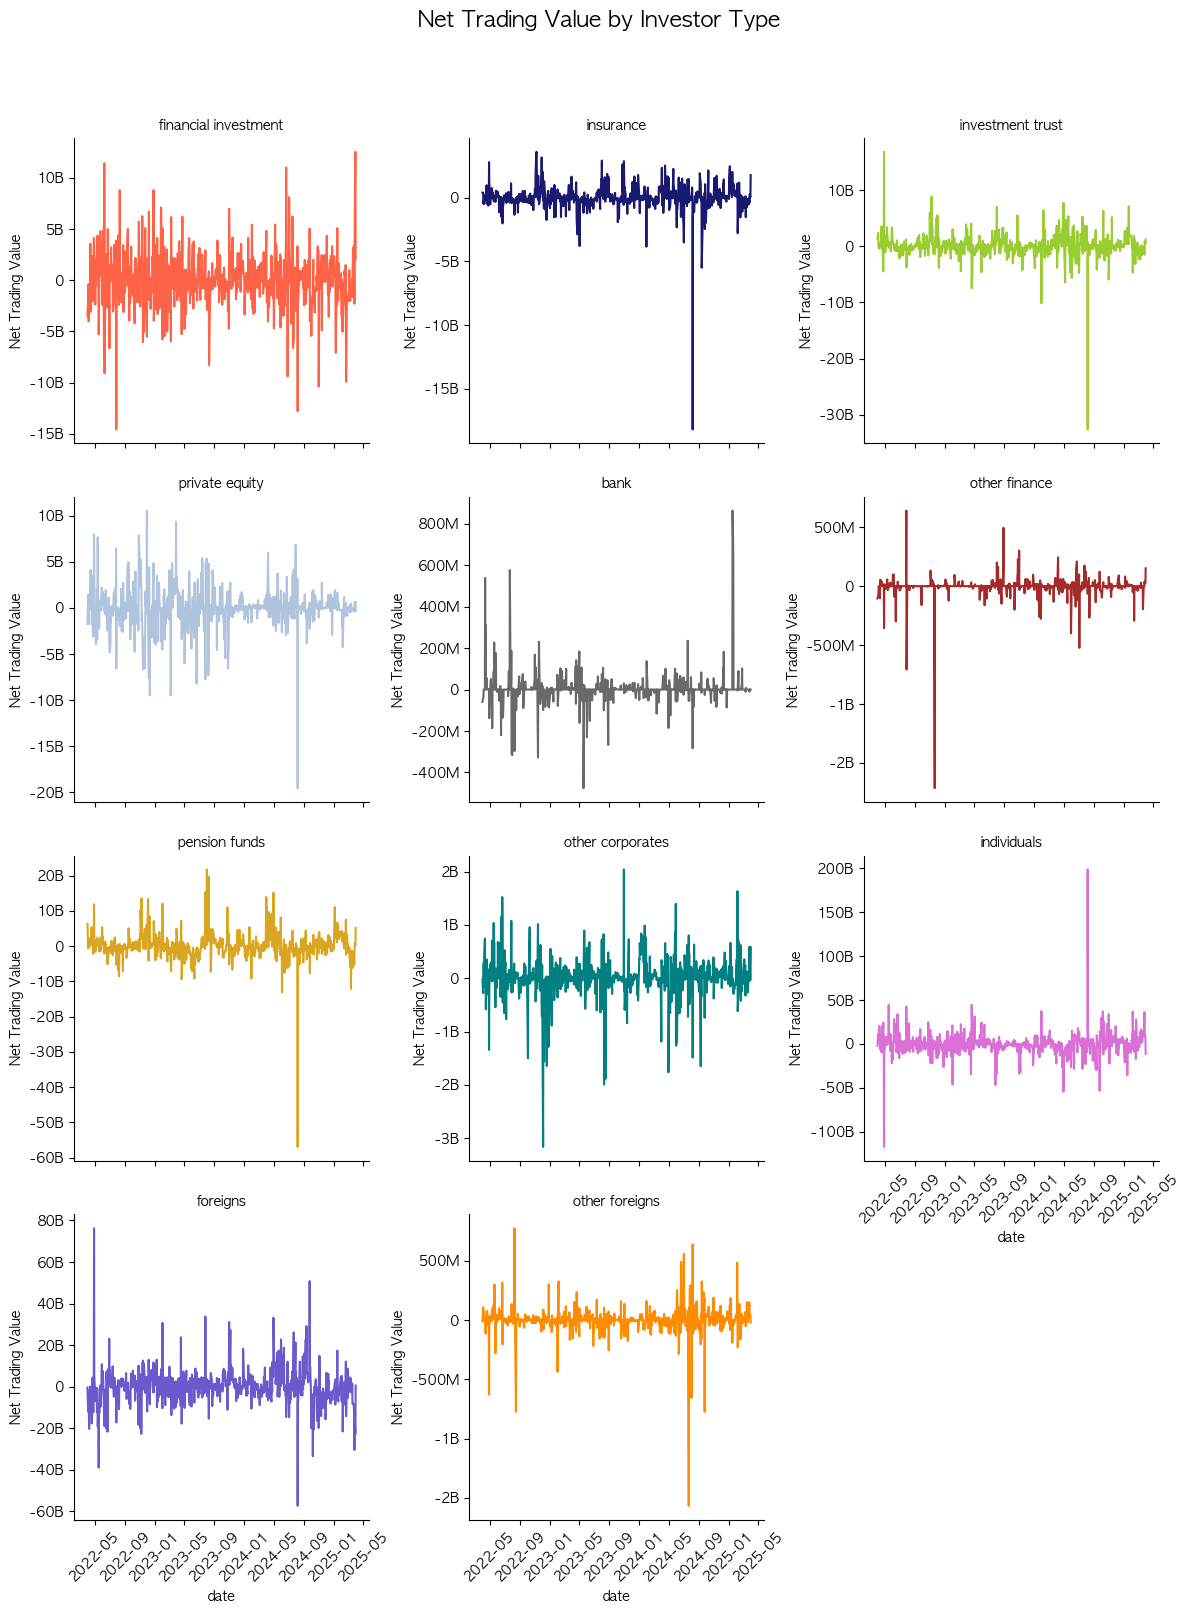

In [51]:
# Drop 'total' column and melt the DataFrame
df_subset = df_TVal.drop(columns='total', errors='ignore')
df_subset = df_subset.loc["2022-04-01":"2025-04-01"]
df_subset = df_subset.reset_index().melt(id_vars='date', var_name='Investor', value_name='Net Trading Value')

# Map investor to color
unique_investors = df_subset['Investor'].unique()
palette_dict = {investor: clr_palette[i % len(clr_palette)] for i, investor in enumerate(unique_investors)}

# Custom formatter for human-readable y-axis
def human_format(x, _):
    if abs(x) >= 1e9:
        return f'{x/1e9:.0f}B'
    elif abs(x) >= 1e6:
        return f'{x/1e6:.0f}M'
    elif abs(x) >= 1e3:
        return f'{x/1e3:.0f}K'
    else:
        return f'{x:.0f}'

# Define custom plotting function that applies colors manually
def custom_lineplot(data, color=None, **kwargs):
    investor = data['Investor'].iloc[0]
    sns.lineplot(data=data, x='date', y='Net Trading Value', color=palette_dict[investor], **kwargs)

# Create FacetGrid
g = sns.FacetGrid(df_subset, col="Investor", col_wrap=3, height=4, sharey=False)
g.map_dataframe(custom_lineplot)

# Format each subplot
for ax in g.axes.flatten():
    ax.yaxis.set_major_formatter(FuncFormatter(human_format))
    ax.tick_params(axis='x', rotation=45)

# Titles and spacing
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Net Trading Value by Investor Type", fontsize=16)
plt.show()

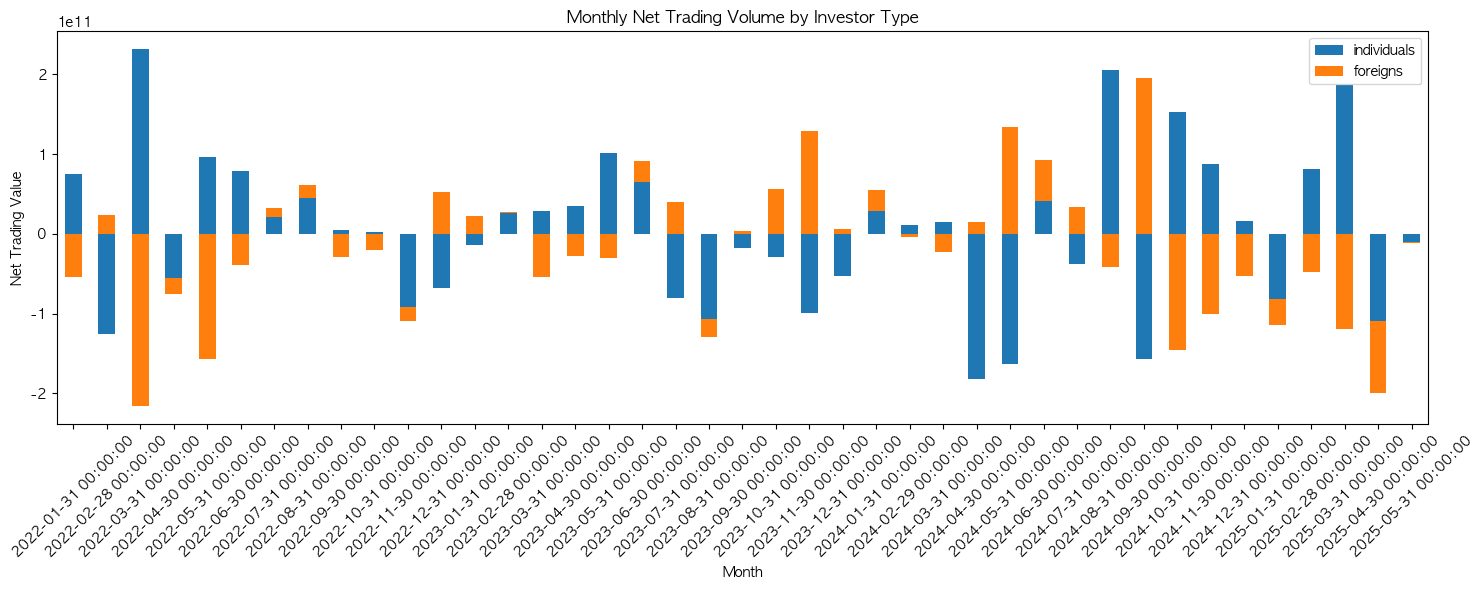

In [19]:
df_monthly = df_TVal[investors].resample('M').sum()
df_monthly.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title("Monthly Net Trading Volume by Investor Type")
plt.ylabel("Net Trading Value")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [15]:
df_TVal_short = stock.get_market_trading_value_by_date(startdate, today, amorepacific, on='매도',detail=True)
df_TVal_short.rename(columns=kor_to_eng,inplace=True)
df_TVal_short.rename_axis('date',inplace=True)
print(df_TVal_short.head())

            financial investment   insurance  investment trust  \
date                                                             
2022-01-03            2176162500   213530500         140637500   
2022-01-04            7520823000   102160000         831197000   
2022-01-05            8798181500   646195500        1665675500   
2022-01-06            5262352500  1123820500        1381032500   
2022-01-07            4593844000   359452000          21963000   

            private equity      bank  other finance  pension funds  \
date                                                                 
2022-01-03        48886500  19420000              0     1635445000   
2022-01-04      1911660000  12294000       18936000     3505487000   
2022-01-05        46917000         0              0     1580310500   
2022-01-06       837738500         0       56598500     3319116500   
2022-01-07       207856000         0              0     2239787500   

            other corporates  individuals     

In [21]:
df_TVal_long = stock.get_market_trading_value_by_date(startdate, today, amorepacific, on='매수',detail=True)
df_TVal_long.rename(columns=kor_to_eng,inplace=True)
df_TVal_long.rename_axis('date',inplace=True)
print(df_TVal_long.head())

            financial investment  insurance  investment trust  private equity  \
date                                                                            
2022-01-03             655930500   37325000          82370500        76000500   
2022-01-04             349498000   38518500         166934500        17490500   
2022-01-05             777056000          0          58034000        31792500   
2022-01-06            1221743000   10967500        1610656500       361137000   
2022-01-07            1706597000   38304500         149495000       533228000   

              bank  other finance  pension funds  other corporates  \
date                                                                 
2022-01-03       0              0      618325000         420634000   
2022-01-04       0        3659500     1526115500          22614000   
2022-01-05  324000        1931500      984445500         344514000   
2022-01-06  950000        1471500     1649490000          11223500   
2022-01-07  

In [58]:
df_TVal_inv = stock.get_market_trading_value_by_investor("20240101", today, amorepacific)
df_TVal_inv.rename(index=kor_to_eng, columns=kor_to_eng,inplace=True)
df_TVal_inv.rename_axis('investor type',inplace=True)
print(df_TVal_inv)

                                    sell             buy       net buy
investor type                                                         
financial investment        687579544150    653682789100  -33896755050
insurance                   155460795350    146028640550   -9432154800
investment trust            348955791150    339071149100   -9884642050
private equity              167705191200    175159336800    7454145600
bank                          2599655000      4349756400    1750101400
other finance                 5754663700      4085378650   -1669285050
pension funds and others   1337466457400   1328214496400   -9251961000
institutions               2705522097950   2650591547000  -54930550950
other corporates             63872721200     74377679000   10504957800
individuals                5514516947700   5701042982600  186526034900
foreigns                   4282294237542   4139276894392 -143017343150
other foreigns               23802187150     24719088550     916901400
total 

# 4. Market Trading Volume

In [60]:
df_TVol = stock.get_market_trading_volume_by_investor("20240101", today, amorepacific)
df_TVol.rename(index=kor_to_eng,columns=kor_to_eng,inplace=True)
df_TVol.rename_axis('investor type',inplace=True)
print(df_TVol)

                              sell       buy  net buy
investor type                                        
financial investment       4974876   4805667  -169209
insurance                  1151917   1073262   -78655
investment trust           2550112   2449230  -100882
private equity             1178065   1220730    42665
bank                         18538     32516    13978
other finance                41581     29695   -11886
pension funds and others   9696426   9654952   -41474
institutions              19611515  19266052  -345463
other corporates            443687    544792   101105
individuals               40240658  42934110  2693452
foreigns                  32464867  30003794 -2461073
other foreigns              167559    179538    11979
total                     92928286  92928286        0


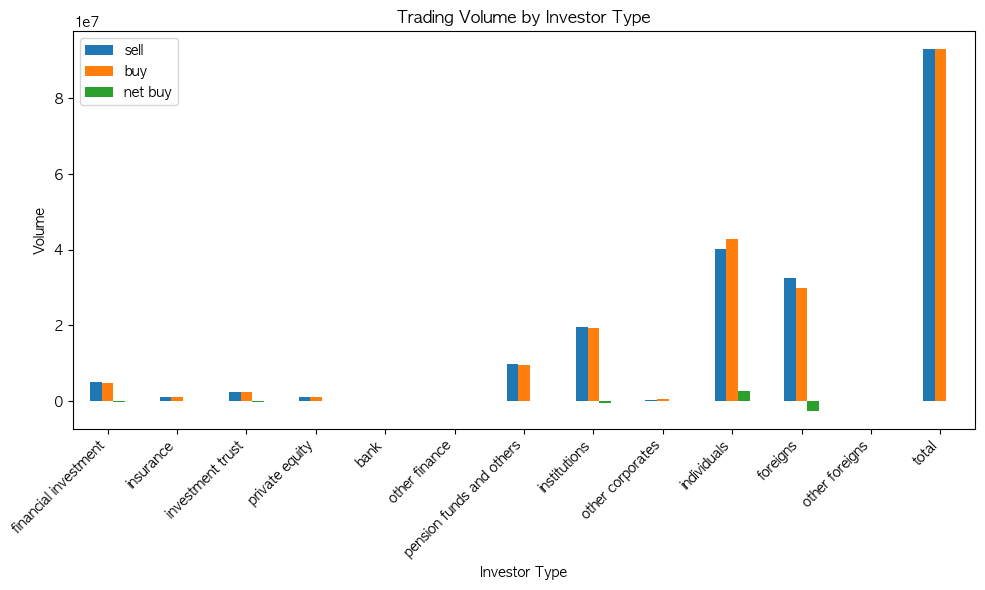

In [63]:
# Assuming df_TVol is the DataFrame with your data
df_TVol[['sell', 'buy', 'net buy']].plot(kind='bar', figsize=(10, 6))

plt.title('Trading Volume by Investor Type')
plt.xlabel('Investor Type')
plt.ylabel('Volume')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

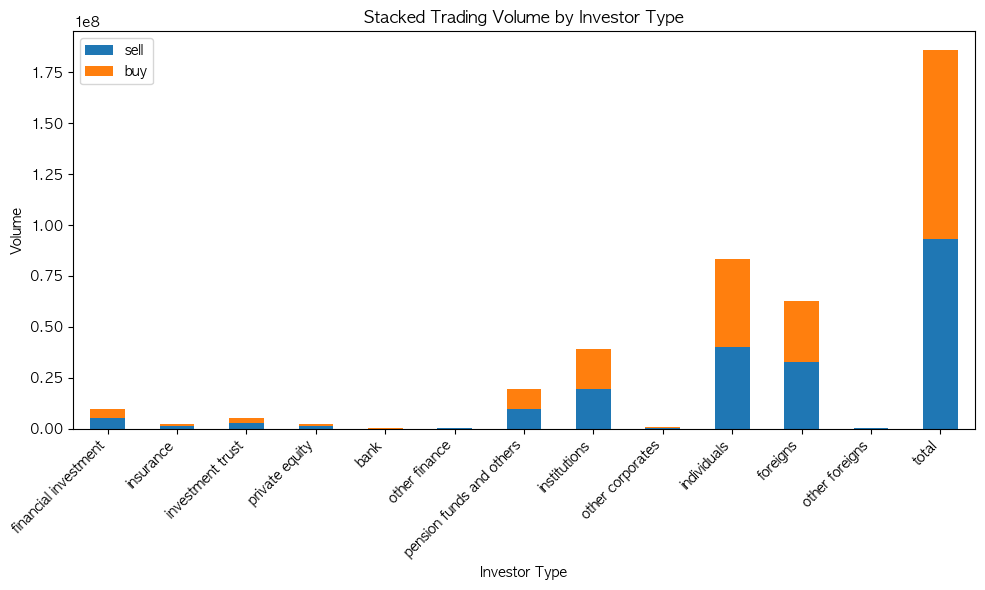

In [64]:
# Stacked bar chart showing 'sell' and 'buy' volumes for each investor type
df_TVol[['sell', 'buy']].plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Stacked Trading Volume by Investor Type')
plt.xlabel('Investor Type')
plt.ylabel('Volume')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
df_MC = stock.get_market_cap(startdate, today, amorepacific)
df_MC.rename(columns=kor_to_eng,inplace=True)
df_MC.rename_axis('date',inplace=True)
print(df_MC.head())

               market cap  trading volume  trading value  listed shares
date                                                                   
2022-01-03  9826783512000          157696    26347604500       58492759
2022-01-04  9739044373500          198915    33097043500       58492759
2022-01-05  9475826958000          390474    63047179500       58492759
2022-01-06  9563566096500          319517    51602509000       58492759
2022-01-07  9388087819500          269295    43342195000       58492759


In [26]:
df_foreign_ER = stock.get_exhaustion_rates_of_foreign_investment(startdate, today, amorepacific)
df_foreign_ER.rename(columns=kor_to_eng,inplace=True)
df_foreign_ER.rename_axis('date',inplace=True)
print(df_foreign_ER.head())

            listed shares  shares held  ownership ratio  \
date                                                      
2022-01-03       58492759     17742263        30.328125   
2022-01-04       58492759     17750913        30.343750   
2022-01-05       58492759     17788616        30.406250   
2022-01-06       58492759     17703758        30.265625   
2022-01-07       58492759     17736642        30.312500   

            investment limit (shares)  limit usage rate  
date                                                     
2022-01-03                   58492759         30.328125  
2022-01-04                   58492759         30.343750  
2022-01-05                   58492759         30.406250  
2022-01-06                   58492759         30.265625  
2022-01-07                   58492759         30.312500  
